In [1]:
print("OK")

OK


# Q&A over the Code Base to Understand How it Works

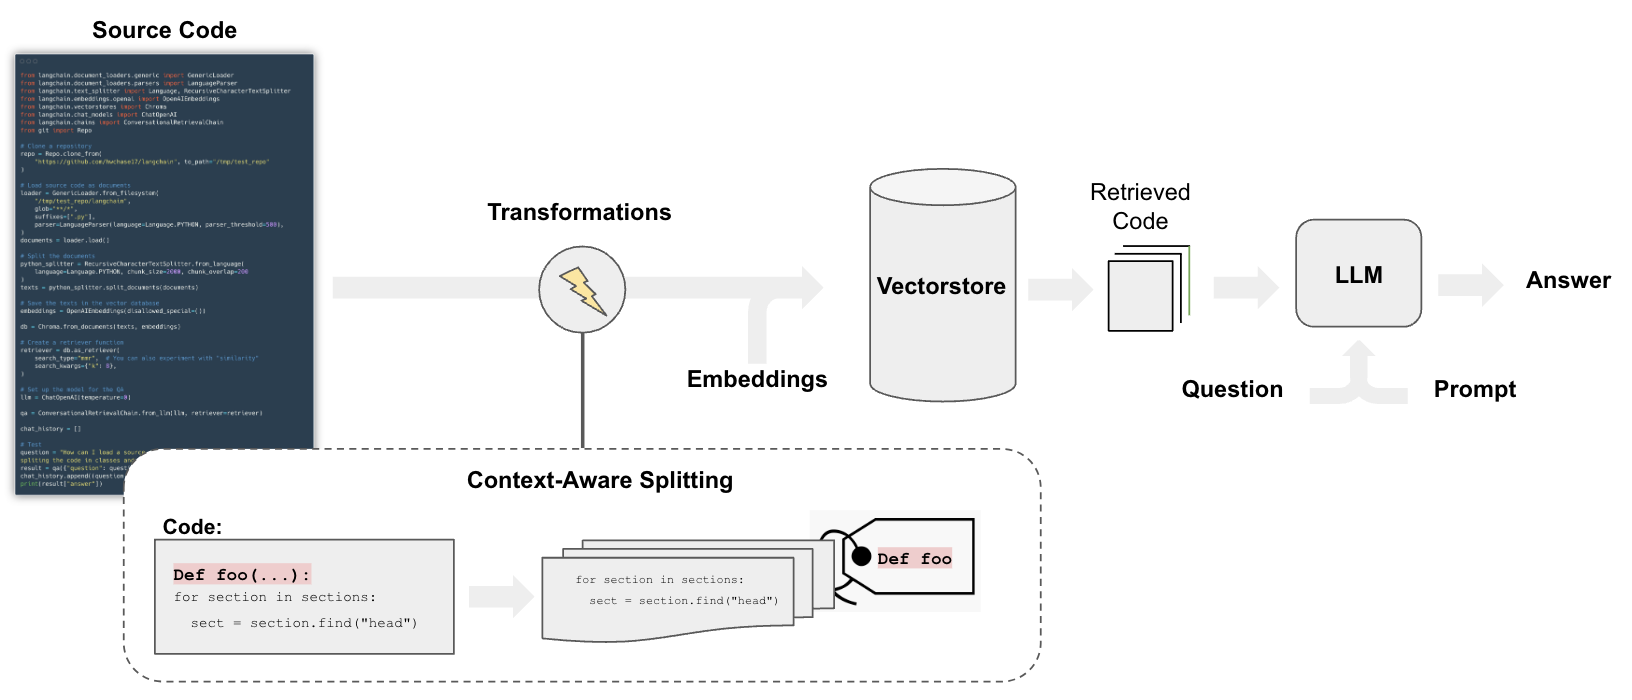

In [2]:
from git import Repo
from langchain.text_splitter import Language
from langchain.document_loaders.generic import GenericLoader
from langchain.document_loaders.parsers import LanguageParser
from langchain.text_splitter import RecursiveCharacterTextSplitter
import os
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from langchain.chat_models import ChatOpenAI
from langchain.memory import ConversationSummaryMemory
from langchain.chains import ConversationalRetrievalChain

In [3]:
%pwd

'e:\\Bappy\\Coding\\Youtube\\Generative AI\\Langchain-Projects\\End-to-end-Source-Code-Analysis-Generative-AI\\research'

In [5]:
!mkdir test_repo

In [6]:
repo_path = "test_repo/"

repo = Repo.clone_from("https://github.com/entbappy/End-to-end-Medical-Chatbot-Generative-AI", to_path=repo_path)

In [7]:
loader = GenericLoader.from_filesystem(repo_path,
                                        glob = "**/*",
                                       suffixes=[".py"],
                                       parser = LanguageParser(language=Language.PYTHON, parser_threshold=500)
)

In [8]:
documents = loader.load()

In [9]:
documents

[Document(page_content='from flask import Flask, render_template, jsonify, request\nfrom src.helper import download_hugging_face_embeddings\nfrom langchain_pinecone import PineconeVectorStore\nfrom langchain_openai import OpenAI\nfrom langchain.chains import create_retrieval_chain\nfrom langchain.chains.combine_documents import create_stuff_documents_chain\nfrom langchain_core.prompts import ChatPromptTemplate\nfrom dotenv import load_dotenv\nfrom src.prompt import *\nimport os\n\napp = Flask(__name__)\n\nload_dotenv()\n\nPINECONE_API_KEY=os.environ.get(\'PINECONE_API_KEY\')\nOPENAI_API_KEY=os.environ.get(\'OPENAI_API_KEY\')\n\nos.environ["PINECONE_API_KEY"] = PINECONE_API_KEY\nos.environ["OPENAI_API_KEY"] = OPENAI_API_KEY\n\nembeddings = download_hugging_face_embeddings()\n\n\nindex_name = "medicalbot"\n\n# Embed each chunk and upsert the embeddings into your Pinecone index.\ndocsearch = PineconeVectorStore.from_existing_index(\n    index_name=index_name,\n    embedding=embeddings\n)\

In [10]:
len(documents)

7

In [11]:
documents[0]

Document(page_content='from flask import Flask, render_template, jsonify, request\nfrom src.helper import download_hugging_face_embeddings\nfrom langchain_pinecone import PineconeVectorStore\nfrom langchain_openai import OpenAI\nfrom langchain.chains import create_retrieval_chain\nfrom langchain.chains.combine_documents import create_stuff_documents_chain\nfrom langchain_core.prompts import ChatPromptTemplate\nfrom dotenv import load_dotenv\nfrom src.prompt import *\nimport os\n\napp = Flask(__name__)\n\nload_dotenv()\n\nPINECONE_API_KEY=os.environ.get(\'PINECONE_API_KEY\')\nOPENAI_API_KEY=os.environ.get(\'OPENAI_API_KEY\')\n\nos.environ["PINECONE_API_KEY"] = PINECONE_API_KEY\nos.environ["OPENAI_API_KEY"] = OPENAI_API_KEY\n\nembeddings = download_hugging_face_embeddings()\n\n\nindex_name = "medicalbot"\n\n# Embed each chunk and upsert the embeddings into your Pinecone index.\ndocsearch = PineconeVectorStore.from_existing_index(\n    index_name=index_name,\n    embedding=embeddings\n)\n

In [12]:
documents_splitter = RecursiveCharacterTextSplitter.from_language(language = Language.PYTHON,
                                                             chunk_size = 500,
                                                             chunk_overlap = 20)

In [13]:
texts = documents_splitter.split_documents(documents)

In [14]:
texts

[Document(page_content='from flask import Flask, render_template, jsonify, request\nfrom src.helper import download_hugging_face_embeddings\nfrom langchain_pinecone import PineconeVectorStore\nfrom langchain_openai import OpenAI\nfrom langchain.chains import create_retrieval_chain\nfrom langchain.chains.combine_documents import create_stuff_documents_chain\nfrom langchain_core.prompts import ChatPromptTemplate\nfrom dotenv import load_dotenv\nfrom src.prompt import *\nimport os\n\napp = Flask(__name__)\n\nload_dotenv()', metadata={'source': 'test_repo\\app.py', 'language': <Language.PYTHON: 'python'>}),
 Document(page_content='load_dotenv()\n\nPINECONE_API_KEY=os.environ.get(\'PINECONE_API_KEY\')\nOPENAI_API_KEY=os.environ.get(\'OPENAI_API_KEY\')\n\nos.environ["PINECONE_API_KEY"] = PINECONE_API_KEY\nos.environ["OPENAI_API_KEY"] = OPENAI_API_KEY\n\nembeddings = download_hugging_face_embeddings()\n\n\nindex_name = "medicalbot"\n\n# Embed each chunk and upsert the embeddings into your Pin

In [15]:
len(texts)

13

In [16]:
from dotenv import load_dotenv
load_dotenv()

OPENAI_API_KEY=os.environ.get('OPENAI_API_KEY')

In [17]:
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

In [18]:
embeddings=OpenAIEmbeddings(disallowed_special=())

In [19]:
vectordb = Chroma.from_documents(texts, embedding=embeddings, persist_directory='./db')

In [20]:
vectordb.persist()

In [21]:
# llm = ChatOpenAI(model_name="gpt-4")
llm = ChatOpenAI()

In [22]:
memory = ConversationSummaryMemory(llm=llm, memory_key = "chat_history", return_messages=True)

In [23]:
qa = ConversationalRetrievalChain.from_llm(llm, retriever=vectordb.as_retriever(search_type="mmr", search_kwargs={"k":8}), memory=memory)

In [24]:
question = "what is download_hugging_face_embeddings funtion?"

In [25]:
result = qa(question)
print(result['answer'])

Number of requested results 20 is greater than number of elements in index 13, updating n_results = 13


The `download_hugging_face_embeddings` function downloads embeddings from the Hugging Face model "sentence-transformers/all-MiniLM-L6-v2", which returns embeddings of 384 dimensions. These embeddings are used for processing and analyzing text data in the context of the application.


In [26]:
question = "what is load_pdf_file funtion?"
result = qa(question)
print(result['answer'])

Number of requested results 20 is greater than number of elements in index 13, updating n_results = 13


The `load_pdf_file` function loads PDF files from a specified directory using the `DirectoryLoader` class with a filter for PDF files. It then extracts the documents and returns them.
